In [ ]:
Naives Bayes
XGBClassifier

## 데이콘 Basic 여행 상품 신청 여부 예측 경진대회

https://dacon.io/competitions/official/235959/overview/description

### 변수 정보

### 1. train.csv : 학습 데이터

* id : 샘플 아이디
* Age : 나이
* TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
* CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
* DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
* Occupation : 직업
* Gender : 성별
* NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
* NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
* ProductPitched : 영업 사원이 제시한 상품
* PreferredPropertyStar : 선호 호텔 숙박업소 등급
* MaritalStatus : 결혼여부
* NumberOfTrips : 평균 연간 여행 횟수
* Passport : 여권 보유 여부 (0: 없음, 1: 있음)
* PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
* OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
* NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
* Designation : (직업의) 직급
* MonthlyIncome : 월 급여
* ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)


### 2. 목적
* 나이, 성별, 월 수입 등의 고객 데이터를 이용해서 여행 상품 신청 여부를 예측

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. train.csv

In [2]:
# train 데이터 불러오기

train = pd.read_csv('train.csv')
train

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [4]:
# 변수 타입 확인

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [5]:
# 범주형: 변수 범주 확인
## 제품 인지 방법

print(train['TypeofContact'].unique())

['Company Invited' 'Self Enquiry' nan]


In [6]:
## 직업

print(train['Occupation'].unique())

['Small Business' 'Salaried' 'Large Business' 'Free Lancer']


In [7]:
## 성별

print(train['Gender'].unique())

['Male' 'Female' 'Fe Male']


In [8]:
## 영업사원 제시 상품

print(train['ProductPitched'].unique())

['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe']


In [9]:
## 결혼여부

print(train['MaritalStatus'].unique())

['Married' 'Single' 'Divorced' 'Unmarried']


In [10]:
## 직급

print(train['Designation'].unique())

['Executive' 'Manager' 'VP' 'Senior Manager' 'AVP']


### Gender 값 변경

In [3]:
train['Gender'].value_counts()

Male       1207
Female      692
Fe Male      56
Name: Gender, dtype: int64

In [4]:
# Fe Male을 Female로 변경

train.loc[train['Gender']=='Fe Male','Gender']= 'Female'

In [5]:
train['Gender'].value_counts()

Male      1207
Female     748
Name: Gender, dtype: int64

### 중복 데이터

In [15]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1950    False
1951    False
1952    False
1953    False
1954    False
Length: 1955, dtype: bool

In [16]:
# 중복 데이터 없음

train[train.duplicated()]

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken


### 결측치

In [17]:
# 결측치 확인

train.isnull().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [18]:
train.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [ ]:
# 결측치

Age(나이)  94
TypeofContact(고객의 제품 인지 방법)  10
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [ ]:
# 연속형

Age(나이)  94
DurationOfPitch(영업사원이 고객에게 제공하는 프레젠테이션 기간)  102
NumberOfFollowups(영업 사원의 프레젠테이션 후 이루어진 후속 조치 수)  13
PreferredPropertyStar(선호 호텔 숙박업소 등급)  10
NumberOfTrips(평균 여간 여행 횟수)  57
NumberOfChildrenVisiting(함께 여행을 계획 중인 5세 미만의 어린이 수)  27
MonthlyIncome(월 급여)  100

In [ ]:
# 범주형

TypeofContact(고객의 제품 인지 방법)  10

### 결측치 처리

In [ ]:
# 'Fe Male'로 저장되어 있는 값들 'Female'로 변경
train_df.loc[train_df['Gender'] == 'Fe Male', 'Gender'] = 'Female'

1. 결측치 
- Age(37)
- DurationOfPitch(9 / 평균 / 중앙값 중 성능 좋은 것으로)
- NumberOfFollowups(4)
- PreferredPropertyStar(3)
- NumberOfTrips(3)
- NumberOfChildrenVisiting(1)
- MonthlyIncome (평균)

- TypeofContact(범주형) -> 'Unknown'으로 대체

2. 이상치
- 그대로

1. Age 나이
* 평균값(37.0)

In [22]:
print(train['Age'].mean())

37.46211714132187


2. DurationOfPitch 
* 최빈값(9)

In [23]:
train['DurationOfPitch'].value_counts()

9.0     199
7.0     126
8.0     122
6.0     116
16.0    114
14.0    112
15.0    105
10.0    103
12.0     85
11.0     83
13.0     83
17.0     75
23.0     41
30.0     39
22.0     36
31.0     34
25.0     32
27.0     31
32.0     30
20.0     29
35.0     29
24.0     27
26.0     27
29.0     27
28.0     25
21.0     24
18.0     23
33.0     22
19.0     18
34.0     18
36.0     15
5.0       3
Name: DurationOfPitch, dtype: int64

3. NumberOfFollowups
* 최빈값(4)

In [24]:
print(train['NumberOfFollowups'].value_counts())

4.0    831
3.0    571
5.0    330
2.0     89
1.0     74
6.0     47
Name: NumberOfFollowups, dtype: int64


4. PreferredPropertyStar
* 최빈값(3)으로 채우기

In [25]:
print(train['PreferredPropertyStar'].value_counts())

3.0    1212
5.0     373
4.0     360
Name: PreferredPropertyStar, dtype: int64


5. NumberOfTrips 
* 평균값 (3)으로 채우기

In [26]:
print(train['NumberOfTrips'].mean())

3.255532139093783


6. NumberOfChildrenVisiting
* 최빈값(1)으로 채우기

In [27]:
print(train['NumberOfChildrenVisiting'].value_counts())

1.0    819
2.0    559
0.0    416
3.0    134
Name: NumberOfChildrenVisiting, dtype: int64


7. MonthlyIncome 
* 평균값(23624.0)

In [28]:
print(train['MonthlyIncome'].mean())

23624.108894878707


8. TypeofContact
* Unknown

In [6]:
train['Age'] = train['Age'].fillna(37)
train['DurationOfPitch'] = train['DurationOfPitch'].fillna(9)
train['TypeofContact'] = train['TypeofContact'].fillna("Unknown")
train['NumberOfFollowups'] = train['NumberOfFollowups'].fillna(4)
train['PreferredPropertyStar'] = train['PreferredPropertyStar'].fillna(3)
train['NumberOfTrips'] = train['NumberOfTrips'].fillna(3)
train['NumberOfChildrenVisiting'] = train['NumberOfChildrenVisiting'].fillna(1)
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(23624.0)

In [7]:
train.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [8]:
train_na=train.copy()

In [9]:
# 범주형 칼럼 추출

ob = train_na.columns[train_na.dtypes == 'object']
ob

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [10]:
# 라벨 인코더
## knn임퓨터는 수치형 자료에만 적용 가능 >> 문자형 변수 숫자로 변환

from sklearn.preprocessing import LabelEncoder

for col in ob:
    encoder = LabelEncoder()  # 라벨 인코더
    encoder.fit(train_na[col])  # 학습
    train_na[col] = encoder.transform(train_na[col]) # 문자형 변수 숫자로 변환
    
train_na

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,9.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,9.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,23624.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


### 이상치

In [ ]:
### 0828 EDA 파일

### 2. test.csv

In [25]:
test = pd.read_csv('test.csv')
test

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


### 결측치

In [26]:
test['Age'] = test['Age'].fillna(37)
test['DurationOfPitch'] = test['DurationOfPitch'].fillna(9)
test['TypeofContact'] = test['TypeofContact'].fillna("Unknown")
test['NumberOfFollowups'] = test['NumberOfFollowups'].fillna(4)
test['PreferredPropertyStar'] = test['PreferredPropertyStar'].fillna(3)
test['NumberOfTrips'] = test['NumberOfTrips'].fillna(3)
test['NumberOfChildrenVisiting'] = test['NumberOfChildrenVisiting'].fillna(1)
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(23624.0)

### Gender 값 변경

In [27]:
test['Gender'].value_counts()

Male       1709
Female     1125
Fe Male      99
Name: Gender, dtype: int64

In [28]:
# Fe Male을 Female로 변경

test.loc[test['Gender']=='Fe Male','Gender']= 'Female'

In [29]:
test['Gender'].value_counts()

Male      1709
Female    1224
Name: Gender, dtype: int64

In [31]:
test_na=test.copy()

In [23]:
# 범주형 칼럼 추출

ob = test.columns[test.dtypes == 'object']
ob

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')

In [35]:
# 라벨 인코더
## knn임퓨터는 수치형 자료에만 적용 가능 >> 문자형 변수 숫자로 변환

from sklearn.preprocessing import LabelEncoder

for col in ob:
    encoder = LabelEncoder()  # 라벨 인코더
    encoder.fit(train_na[col])  # 학습데이터로 학습
    test_na[col] = encoder.transform(test_na[col]) # 테스트 데이터 문자형 변수 숫자로 변환
    
test_na

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,9.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,4.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


### 2. Modeling

In [ ]:
* 모델 별 성능 비교
* 하이퍼파라미터 조정

In [ ]:
Naives Bayes
XGBClassifier

### Naives Bayes

* BernoulliNB : class가 2개일 때 사용
* MultinomialNB : class가 3개 이상일 때 사용
* GaussianNB : 나이브 베이즈의 변형 중 하나인 가우시안 나이브 베이즈 모델을 적용

In [54]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [75]:
# id 제외
train = train_na.drop(columns=['id'])
test = test_na.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [76]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=156)

In [77]:
nb = BernoulliNB()
nb.fit(X_train,Y_train)

C:\Users\abab6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [81]:
y_pred = nb.fit(X_train, Y_train).predict(X_test)

C:\Users\abab6\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
# 모델 성능평가

from sklearn.metrics import accuracy_score, confusion_matrix

print('정확도:', accuracy_score(Y_test, y_pred))

정확도: 0.8542199488491049


### XGBClassifier

* XGB Classifier: 앙상블의 부스팅 기법의 한 종류,
    이전 모델의 오류를 순차적으로 보완해나가는 방식

* XGBoost의 주요장점
</br>(1) 뛰어난 예측 성능
</br>(2) GBM 대비 빠른 수행 시간
</br>(3) 과적합 규제(Overfitting Regularization)
</br>(4) Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임
</br>(5) 자체 내장된 교차 검증

</br>반복 수행시마다 내부적으로 교차검증을 수행해 최적회된 반복 수행횟수를 가질 수 있음
</br>지정된 반복횟수가 아니라 교차검증을 통해 평가 데이트세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 기능이 있음


</br>XGBoost는 독자적인 XGBoost 모듈과 사이킷런 프레임워크 기반의 모듈이 존재합니다.
</br>독자적인 모듈은 고유의 API와 하이퍼파라미터를 사용하지만, 사이킷런 기반 모듈에서는 다른 Estimator와 동일한 사용법을 가지고 있습니다.

In [46]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [37]:
pip install xgboost

In [64]:
# id 제외
train = train_na.drop(columns=['id'])
test = test_na.drop(columns=['id'])

# 분석 목적: prodTake 여행상품 예측
x_train = train.drop(columns=['ProdTaken'])
y_train = train[['ProdTaken']]

In [65]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=156)

In [66]:
#모델 정의
clf = XGBClassifier(learning_rate =0.1, 
                   n_estimators=1000,
                   use_label_encoder=False,
                   random_state=42)

#learning_rate: 이전의 결과를 얼마나 반영할 것인가? 일반적으로 0.01~0.2
#n_estimator: 나무 개수
#use_label_encoder: 라벨 인코더 사용
#random_state : seed값 고정

clf.fit(X_train, Y_train, eval_metric='logloss')

Y_pred= clf.predict(X_test)


C:\Users\abab6\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


In [72]:
# get_clf_eval function 생성
# confusion, accuracy, precision, recall, f1, roc_auc 나타냄

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))

In [73]:
# 예측 결과 확인
get_clf_eval(Y_test, Y_pred)

Confusion Matrix
[[304  14]
 [ 30  43]]
정확도:0.887468030690537, 정밀도:0.7543859649122807, 재현율:0.589041095890411


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

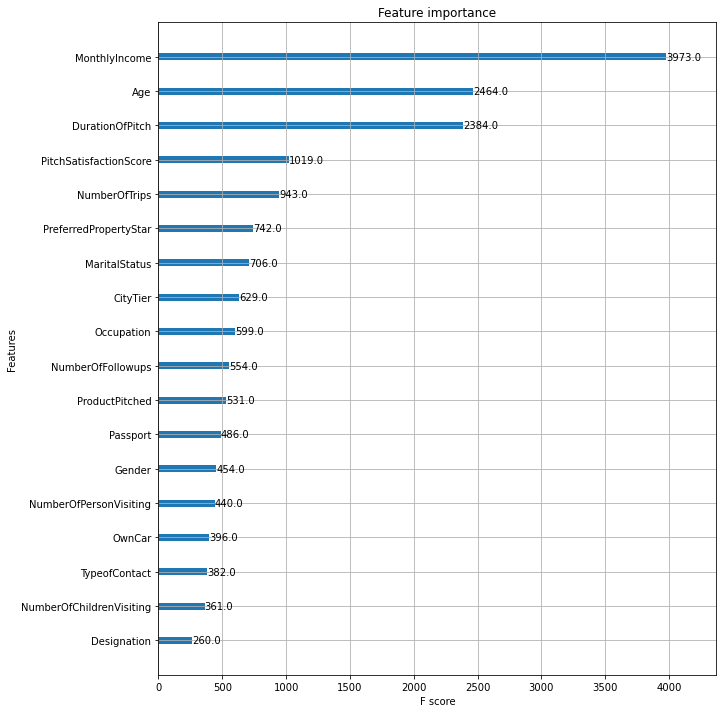

In [47]:
# 특성 중요도
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(clf, ax=ax)

In [ ]:
# 매개변수 (파라미터) 조정

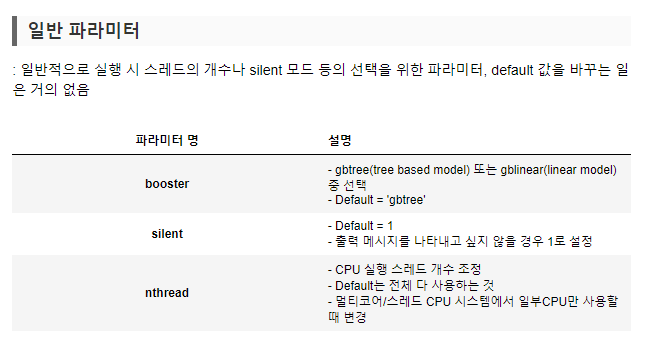

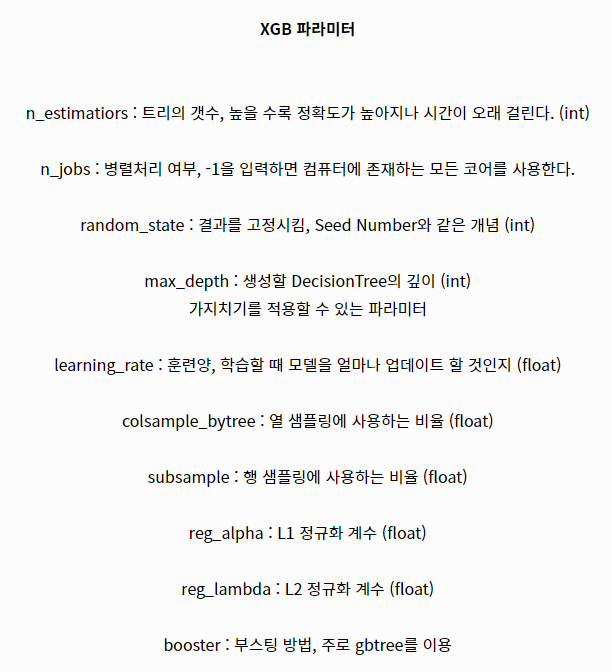

In [86]:
from xgboost import XGBClassifier

# eval set 지정
evals = [(X_test, Y_test)] 

# XGBoost 모델 학습/예측 
# 조기중단 수행 : early_stopping_rounds, eval_set, eval_metric 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , Y_train, early_stopping_rounds=100, eval_set=evals, 
                eval_metric="logloss",  verbose=100)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.64501
[100]	validation_0-logloss:0.35209
[200]	validation_0-logloss:0.35794
[214]	validation_0-logloss:0.35853


In [87]:
# 예측 결과 확인
get_clf_eval(Y_test, w_preds)

Confusion Matrix
[[313   5]
 [ 45  28]]
정확도:0.8721227621483376, 정밀도:0.8484848484848485, 재현율:0.3835616438356164


In [ ]:
## 오류

In [74]:
# 그리드 서치
## 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련
from sklearn.model_selection import GridSearchCV 

# 하이퍼파라미터의 후보 딕셔너리를 만든다.
parameters = dict(C=C, penalty=penalty)

GSLR=GridSearchCV(clf,parameters,cv=10,n_jobs=n_thread,scoring="accuracy")
GSLR.fit(x_train, y_train)

NameError: name 'C' is not defined

In [ ]:
# 최적의 파라미터 값 및 정확도 (Accuracy) 출력
print('final params', GSLR.best_params_)   
print('best score', GSLR.best_score_) 

In [ ]:
predictions= clf.predict(test)